<a href="https://colab.research.google.com/github/Melisa7L/PPS/blob/main/PPS_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias**

In [23]:
!pip install scikit-learn

In [24]:
!python -m spacy download es_core_news_sm

2023-11-28 13:07:07.674528: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 13:07:07.674595: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 13:07:07.674687: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 13:07:07.686588: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 13:07:09.045846: W tensorflow/compiler/

In [25]:
!pip install click

In [26]:
pip install pandas scikit-learn matplotlib

In [27]:
pip install pandas spacy scikit-learn matplotlib


In [28]:
!pip install numpy

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
!pip install spacy

In [31]:
!pip install numpy

In [32]:
!pip install click

In [33]:
!pip install --upgrade click

In [36]:
pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
es-core-news-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [39]:
pip uninstall torch spacy

Found existing installation: torch 2.1.0+cu118
Uninstalling torch-2.1.0+cu118:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/nvfuser/*
    /usr/local/lib/python3.10/dist-packages/torch-2.1.0+cu118.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled torch-2.1.0+cu118
Found existing installation: spacy 3.7.2
Uninstalling spacy-3.7.2:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.10/dist-packages/spacy-3.7.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/spacy/*
Proceed (Y/n)?   Successfully uninstalled spacy-3.7.2


In [42]:
!pip install spacy==3.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 23.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torch<2.2,>=1.10, which is not installed.


In [48]:
pip install seaborn

**SVM**

In [43]:
import pandas as pd
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Leer el archivo XLSX que ya se limpió anteriormente
df = pd.read_excel('Data_para_Red.xlsx')

# Lista de categorías
categorias = df['categoria'].unique()

# Crear un diccionario para mapear categorías a números
categoria_a_numero = {cat: num for num, cat in enumerate(categorias)}
# Asignar etiquetas numéricas a las categorías en el DataFrame
df['categoria_num'] = df['categoria'].map(categoria_a_numero)
# Iterar sobre cada categoría
for categoria in categorias:
    # Filtrar las filas que pertenecen a la categoría específica
    df_categoria = df[df['categoria'] == categoria]

    # Analizar la columna de texto_noticia para la categoría específica
    text = ' '.join(df_categoria['texto_noticia'].astype(str))

    # Normalización del texto
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()

    nlp = spacy.load('es_core_news_sm')
    nlp.max_length = len(text) + 100000
    doc = nlp(text)
    filtered_words = [token.lemma_ for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.lemma_.lower() not in nlp.Defaults.stop_words]
    filtered_text = ' '.join(filtered_words)

    # Contar la frecuencia de las palabras utilizando un diccionario
    word_freq = Counter(filtered_words)

    # Guardar las palabras más frecuentes en un archivo de texto con codificación UTF-8
    with open(f'palabras_mas_frecuentes_{categoria}.txt', 'w', encoding='utf-8') as file:
        for word, freq in word_freq.most_common():
            file.write(f"{word}: {freq}\n")

    # Cargar las palabras más frecuentes desde el archivo de texto
    palabras_mas_frecuentes = list(word_freq.keys())

    # Eliminar duplicados de la lista de palabras más frecuentes
    palabras_mas_frecuentes = list(set(palabras_mas_frecuentes))
# Mostrar las palabras más frecuentes en pantalla
    print(f"Palabras más frecuentes para la categoría {categoria}:")
    print(", ".join(palabras_mas_frecuentes))
    # Vectorización con reducción de dimensionalidad mediante umbral de frecuencia (TF-IDF)
    vectorizer_tfidf = TfidfVectorizer(vocabulary=palabras_mas_frecuentes)
    X_tfidf = vectorizer_tfidf.fit_transform(df['texto_noticia'])
    palabras_tfidf = vectorizer_tfidf.get_feature_names_out()

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['categoria_num'], test_size=0.2, random_state=42)

    # Inicializar y entrenar el clasificador SVM
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = svm_classifier.predict(X_test)

    # Mostrar resultados de la clasificación
    print(f"Resultados para la categoría: {categoria}")
    print(classification_report(y_test, y_pred))

    # Mostrar precisión de la clasificación
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión de la clasificación para la categoría {categoria}: {accuracy:.2f}\n")



Palabras más frecuentes para la categoría educacion:
mayoría, lanzar, integrante, acoger él, beneficio, excluir, mercado, ocasionar, incremento, existencia, falencia, rechazar, abierto, solucionar, meta, invitado, consistir, curricular, ans, entrevista, silvio, tecnológico, habilidad, pedir, paritaria, explicar, nivel, docente, existir, jujeño, asesor, involucrado, infobae, periodo, calidad, desempeño, superar, determinar, movilización, tratar, aseverar, afich, invertir, principal, enviar, básico, zona, presentación, efecto, trámite, mayo, suspender, distrito, sadop, cuestión, modificación, familia, actual, cumplir, pesos, pantalón, renuncia, enfermero, aportar, plan, quedar, acceder, sindical, ingresar, contribuir, estrategia, detallar, fuerza, sanitario, preparado, desconsideración, puntapié, contacto, ocurrir, comandir, necesidad, invierno, cargo, autorizar, trabajador, dialogar, futuro, mano, ministerio, asignir, debate, caber, implementar, clase, regir, postergación, internacional

**Graficos**

*Matriz de confusion*


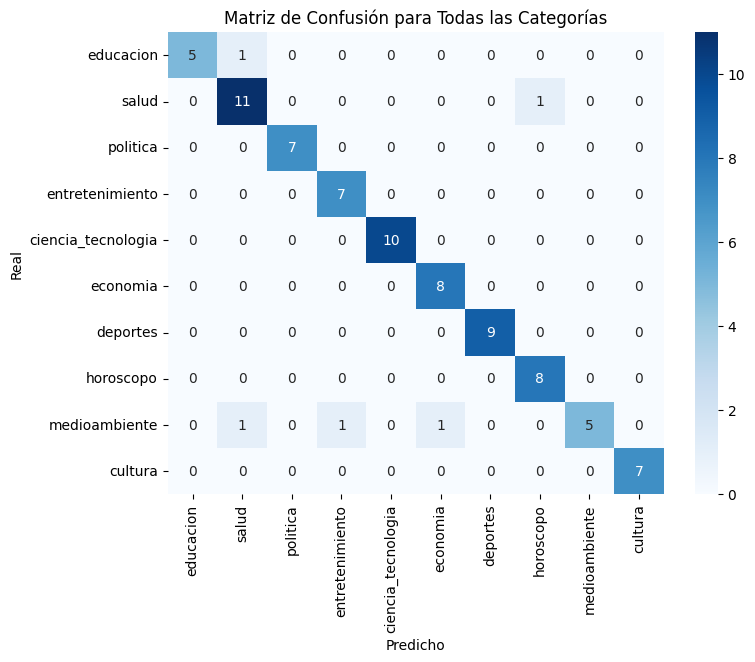

In [49]:
# Mostrar matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categorias, yticklabels=categorias)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión para Todas las Categorías')
plt.show()

*Curva ROC (Receiver Operating Characteristic):*

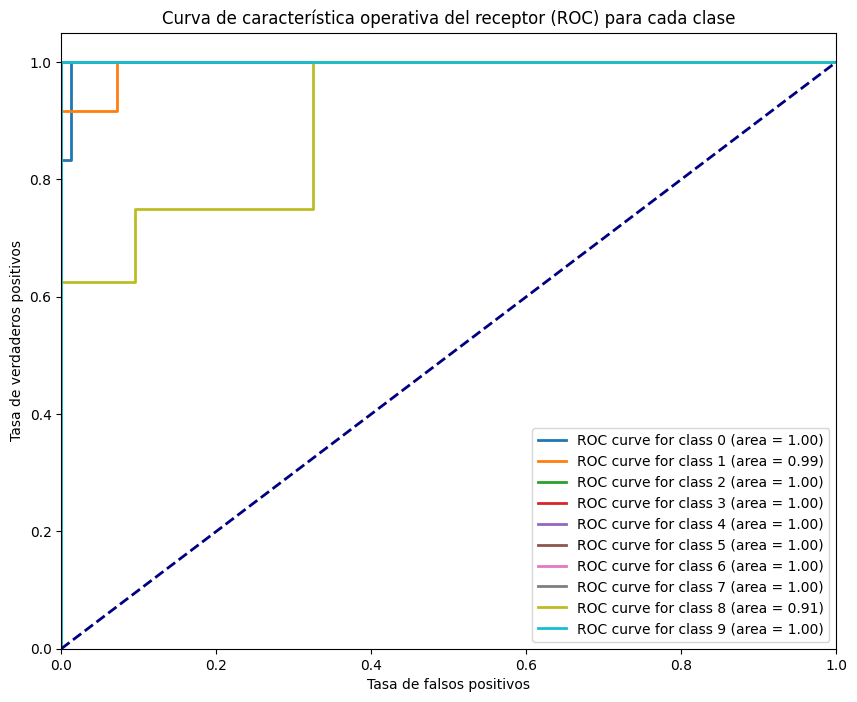

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades en lugar de las predicciones
y_prob = svm_classifier.decision_function(X_test)

# Inicializar la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular la curva ROC para cada clase
for i in range(len(categorias)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Crear el gráfico de la curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(categorias)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva de característica operativa del receptor (ROC) para cada clase')
plt.legend(loc="lower right")
plt.show()


*recisión-Recall Curve:*

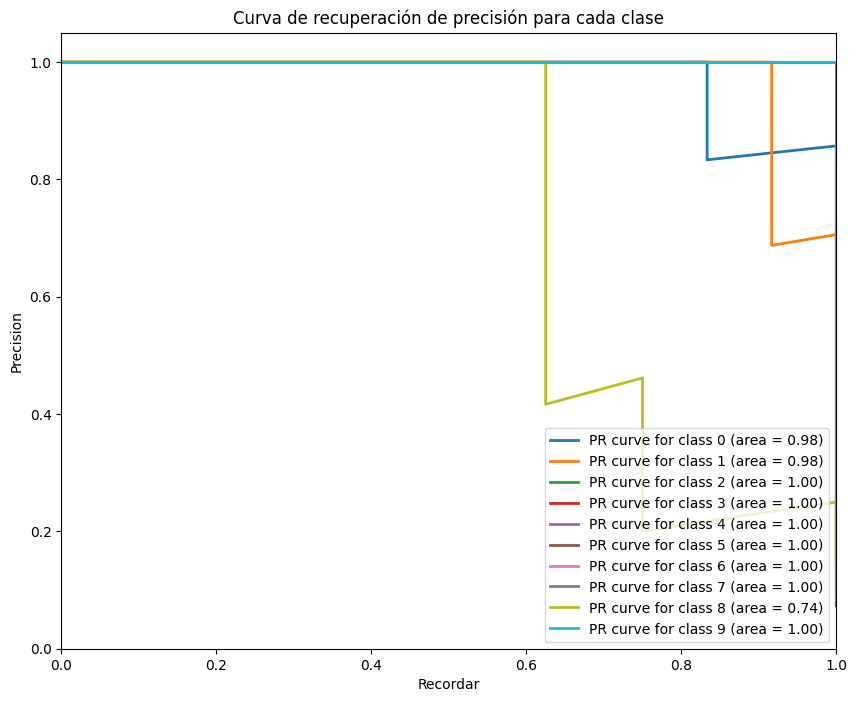

In [51]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Obtener las probabilidades en lugar de las predicciones
y_prob = svm_classifier.decision_function(X_test)

# Inicializar la curva de precisión-recall para cada clase
precision = dict()
recall = dict()
average_precision = dict()

# Calcular la curva de precisión-recall para cada clase
for i in range(len(categorias)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_prob[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_prob[:, i])

# Crear el gráfico de la curva de precisión-recall para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(categorias)):
    plt.plot(recall[i], precision[i], lw=2, label=f'PR curve for class {i} (area = {average_precision[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recordar')
plt.ylabel('Precision')
plt.title('Curva de recuperación de precisión para cada clase')
plt.legend(loc="lower right")
plt.show()


*Grafico de barras*

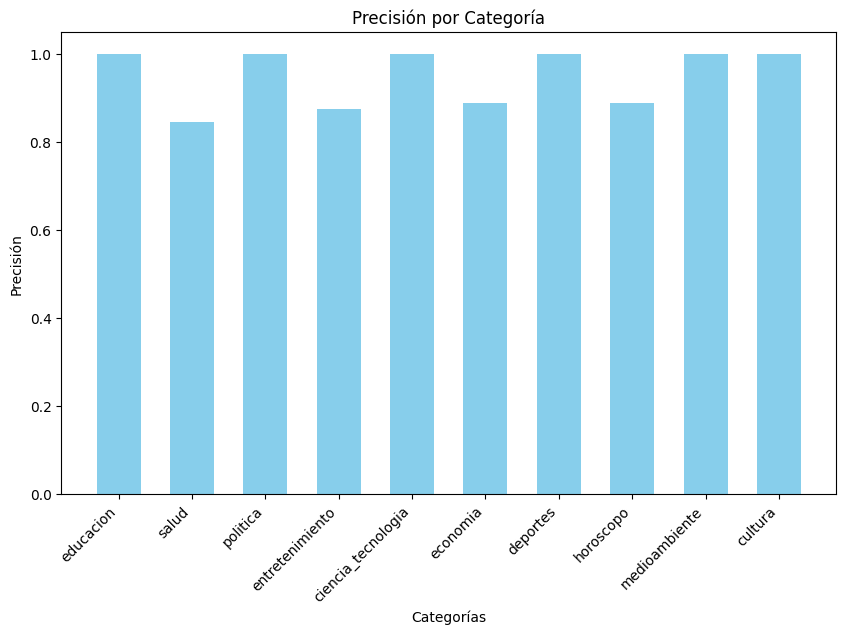

In [52]:
from sklearn.metrics import precision_score
# Calcular la precisión por categoría
precision_scores = precision_score(y_test, y_pred, average=None)
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))
# Crear el gráfico de barras con barras más anchas
plt.bar(categorias, precision_scores, width=0.6, color='skyblue')
# Añadir etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Precisión')
plt.title('Precisión por Categoría')
# Rotar las etiquetas para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.show()


Gráfico de burbujas de precision de clasificación de noticias

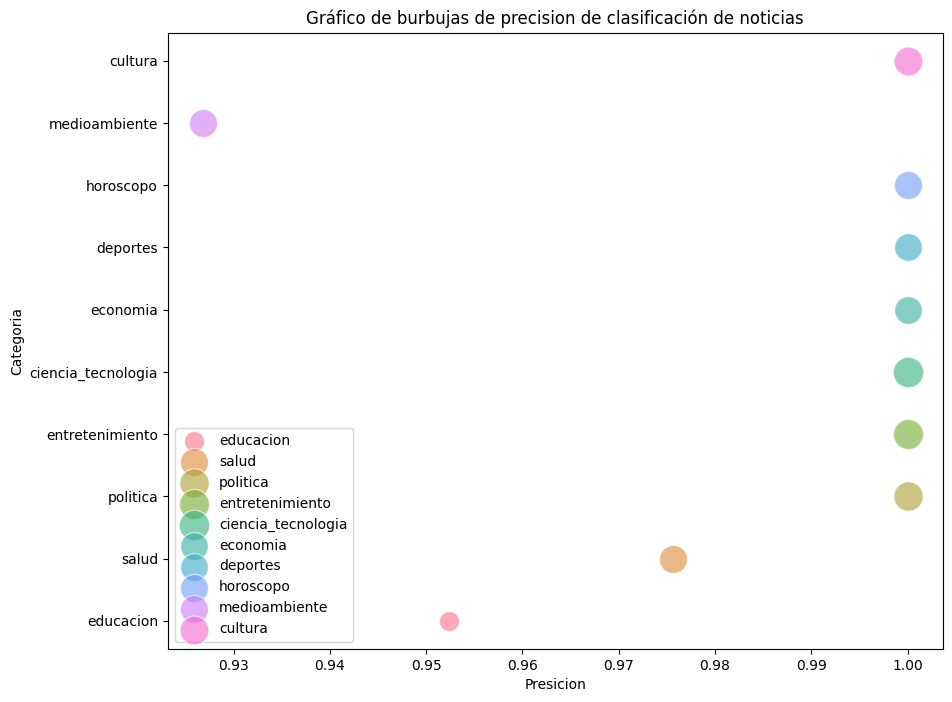

In [53]:
import matplotlib.pyplot as plt

# Crear un diccionario para mapear categorías a colores
categoria_a_color = {cat: color for cat, color in zip(categorias, sns.color_palette("husl", len(categorias)))}

# Crear un gráfico de burbujas
plt.figure(figsize=(10, 8))

for cat in categorias:
    # Filtrar las filas que pertenecen a la categoría específica
    df_categoria = df[df['categoria'] == cat]

    # Obtener las predicciones del clasificador SVM para esta categoría
    y_pred_categoria = svm_classifier.predict(vectorizer_tfidf.transform(df_categoria['texto_noticia']))

    # Calcular el tamaño de la burbuja según la precisión de la clasificación
    accuracy = accuracy_score(df_categoria['categoria_num'], y_pred_categoria)
    size = len(df_categoria) * 10  # Ajusta el tamaño según la cantidad de noticias en esa categoría

    # Obtener el color de la burbuja según la categoría
    color = categoria_a_color[cat]

    # Crear la burbuja en el gráfico
    plt.scatter(accuracy, cat, s=size, color=color, alpha=0.6, edgecolors='w', label=cat)

plt.xlabel('Presicion')
plt.ylabel('Categoria')
plt.title('Gráfico de burbujas de precision de clasificación de noticias')
plt.legend()
plt.show()


**Validacion cruzada para mostrar Precisión media y Desviación estándar**
Se usa cross_val_score de scikit-learn la validación cruzada con 5 divisiones.

Resultados de validación cruzada:
Precisión media: 0.92
Desviación estándar: 0.02


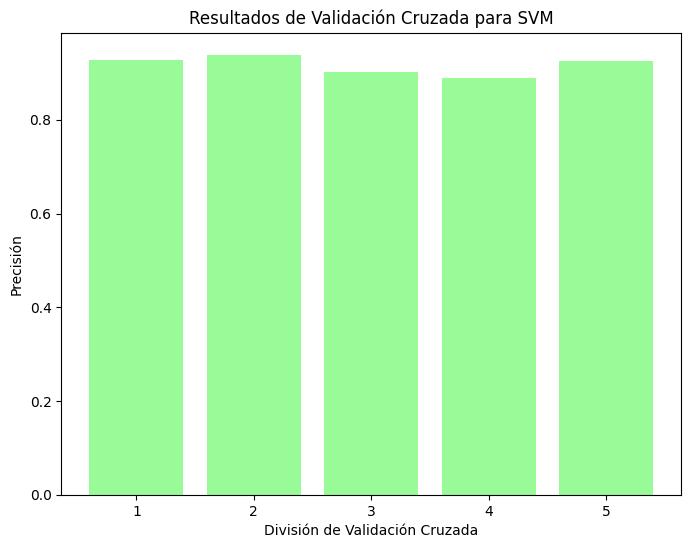

In [71]:
import pandas as pd
import re
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC

# Leer el archivo XLSX con el que ya estaba trabajando
df = pd.read_excel('Data_para_Red.xlsx')

# Lista de categorías
categorias = df['categoria'].unique()

# Crear un diccionario para mapear categorías a números
categoria_a_numero = {cat: num for num, cat in enumerate(categorias)}
# Asignar etiquetas numéricas a las categorías en el DataFrame
df['categoria_num'] = df['categoria'].map(categoria_a_numero)

# Vectorización con reducción de dimensionalidad mediante umbral de frecuencia (TF-IDF)
vectorizer_tfidf = TfidfVectorizer(vocabulary=palabras_mas_frecuentes)
X_tfidf = vectorizer_tfidf.fit_transform(df['texto_noticia'])
palabras_tfidf = vectorizer_tfidf.get_feature_names_out()

# Validación cruzada
svm_classifier = SVC(kernel='linear')
cv_scores = cross_val_score(svm_classifier, X_tfidf, df['categoria_num'], cv=5)

# Mostrar resultados de la validación cruzada
print(f"Resultados de validación cruzada:")
print(f"Precisión media: {cv_scores.mean():.2f}")
print(f"Desviación estándar: {cv_scores.std():.2f}")

# Visualizar resultados de validación cruzada
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores, color='#98FB98')
plt.xlabel('División de Validación Cruzada')
plt.ylabel('Precisión')
plt.title('Resultados de Validación Cruzada para SVM')
plt.show()
